# 0.0.1

### A Random Forest Classifier is a machine learning 
### algorithm that combines multiple decision trees to make predictions. 


# 0.0.4

In [58]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings as wn
import matplotlib.pyplot as plt 

from plotly import express, graph_objects


In [26]:

data = pd.read_csv("Fraud_check.csv")

#display the summary, statistice  
data.info()
data.describe()

#first and last five rows in the dataframe

data.head(5)
data.tail(5)

#display the the number of rows and column in the data
data.shape

# display the dimensions, rows, columns, and the number 
# of unique observations in the dataframe
data.ndim

data.axes

data.columns

data.nunique

# check for missing data in the dataframe

missing_values = data.isna().sum()

print(f"The number of missing values are: \n{missing_values}")





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
The number of missing values are: 
Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [24]:
# check for duplicates
duplicate = data[data.duplicated()].shape
print(duplicate)

(0, 6)


In [31]:
#rename the columns

data = data.rename({"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"}, axis=1)

In [32]:
data.head(1)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES


In [35]:

col_names = ['Undergrad','Marital_Status','Urban']

In [38]:
#count the values in the columns
for val in col_names:
    print(data[val].value_counts())

#

# 0.0.6

In [49]:
conditions = [(data['Taxable_Income']<= 30000),(data["Taxable_Income"])> 30000]

In [50]:
choices = ['Ricky','Good']

data["New_Taxable"] = np.select(conditions, choices)

In [51]:
#Displaying the first 20 rows

data.head(20)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,New_Taxable
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [52]:
label_data = data["New_Taxable"].value_counts()

In [53]:
expl = (0.1,0.1)

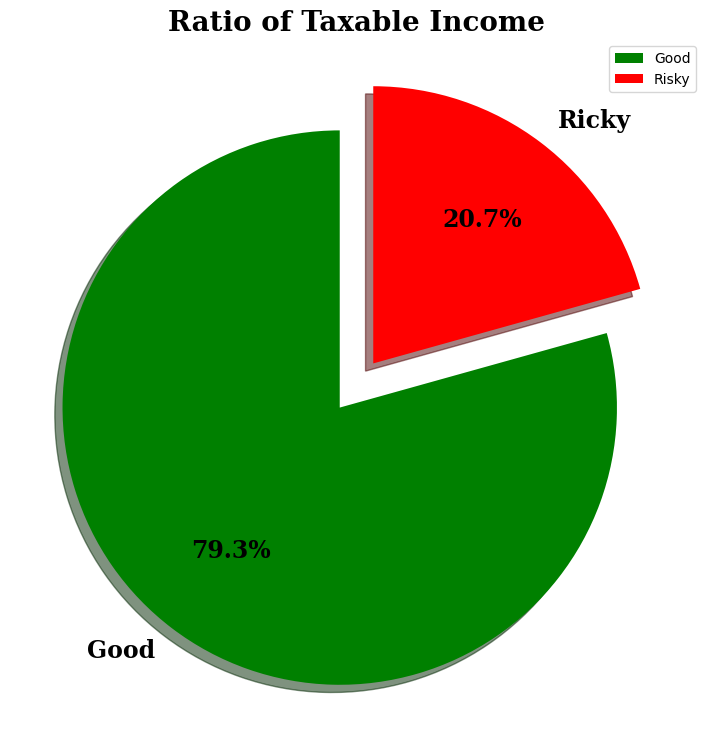

In [54]:
plt.figure(figsize=(15, 9))
pcts = plt.pie(label_data, labels=label_data.index, colors=["green","red"], pctdistance=0.65, shadow=True,
              startangle=90, explode=expl,autopct="%1.1f%%", textprops={"fontsize":17, "color":"black", "weight":"bold","family":"serif"})
# plt.setp(pcts, color="white")
hfont = {"weight":"bold", "family":"serif"}
plt.title("Ratio of Taxable Income", size=20, **hfont)
center_circle = plt.Circle(((0,0),0.40), fc="white")
fig=plt.gcf()
# fig.gca().add_artist(center_circle)
plt.legend(["Good","Risky"], loc="upper right")
plt.show()

In [55]:
continue_col = ["City_Population", "Work_Experience"]

In [56]:
category_col = ["Undergrad","Marital_Status","Taxable_Income", "Urban"]

c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


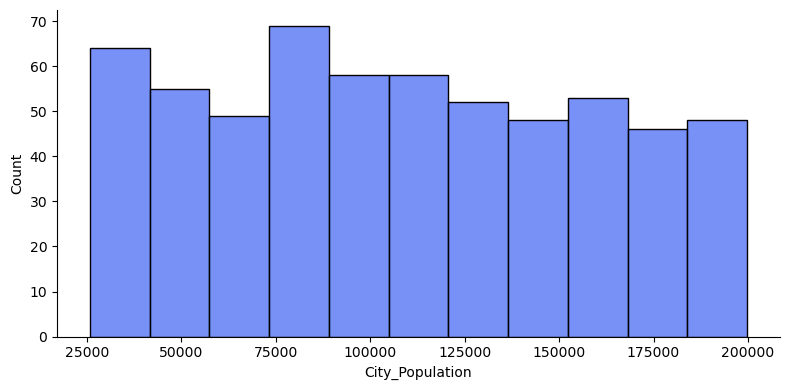

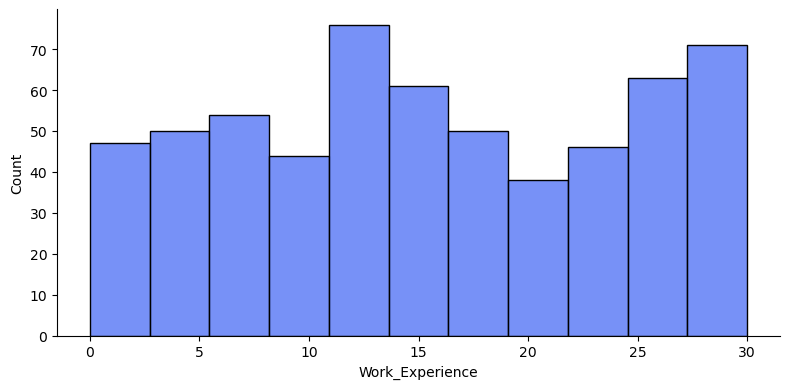

In [60]:
for val in continue_col:
    sns.displot(data=data, x=val, height=4, aspect=2, color='#496DF5')

c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


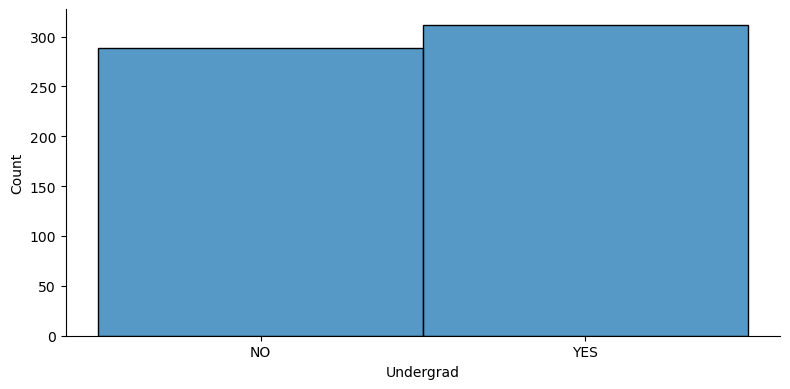

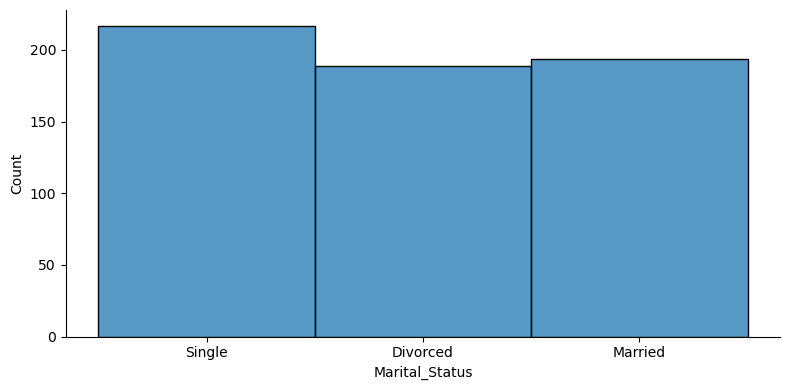

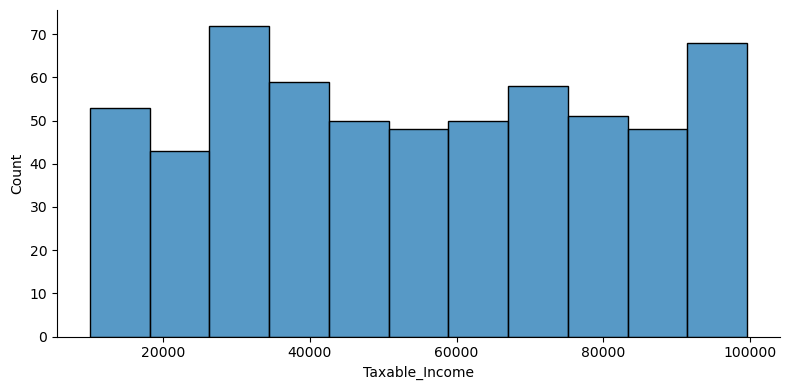

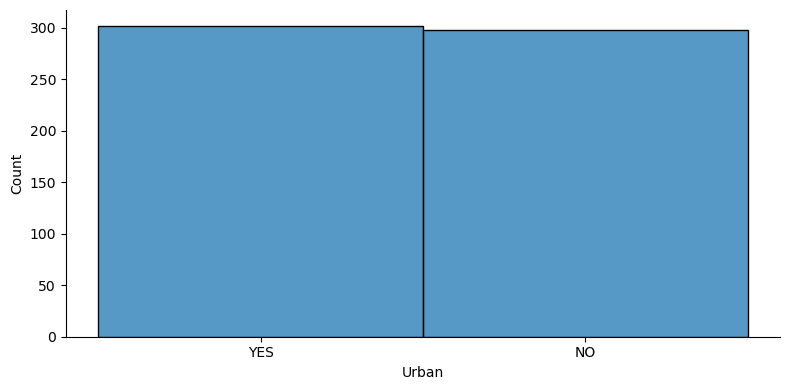

In [61]:
for val in category_col:
    sns.displot(data=data, x=val, height=4, aspect=2)

In [63]:
data = pd.get_dummies(data, columns=["Urban","Undergrad"], drop_first=True)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
string_columns = ["Marital_Status", "New_Taxable"]

In [68]:
number = LabelEncoder()

In [69]:
for i in string_columns:
    data[i] = number.fit_transform(data[i])

In [70]:
data.head()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,New_Taxable,Urban_YES,Undergrad_YES
0,2,68833,50047,10,0,True,False
1,0,33700,134075,18,0,True,True
2,1,36925,160205,30,0,True,False
3,2,50190,193264,15,0,True,True
4,1,81002,27533,28,0,False,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1dead498750>,
 'caps': [<matplotlib.lines.Line2D at 0x1deb055c650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1deb0591110>,
 'medians': [<matplotlib.lines.Line2D at 0x1deb0595110>,
 'fliers': [<matplotlib.lines.Line2D at 0x1deb0591d50>,
 'means': []}

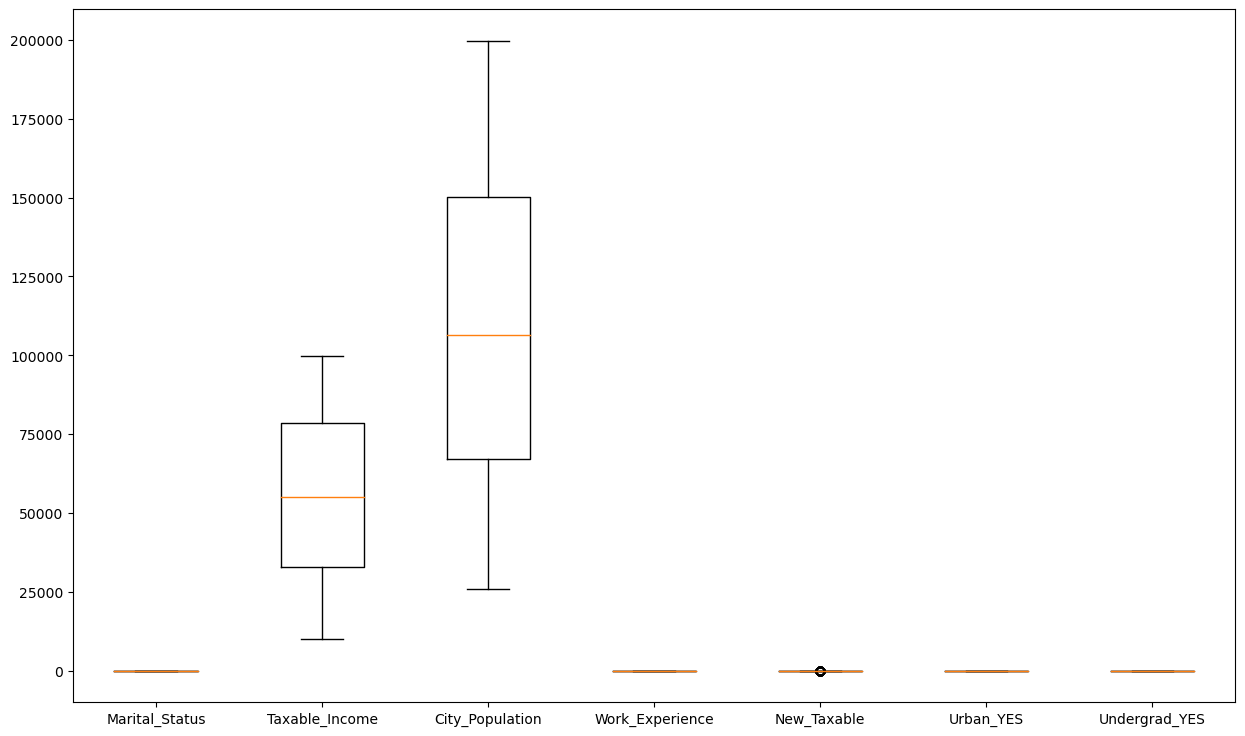

In [71]:
plt.figure(figsize=(15,9))
plt.boxplot(data, labels=data.columns)

c:\Users\phila\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


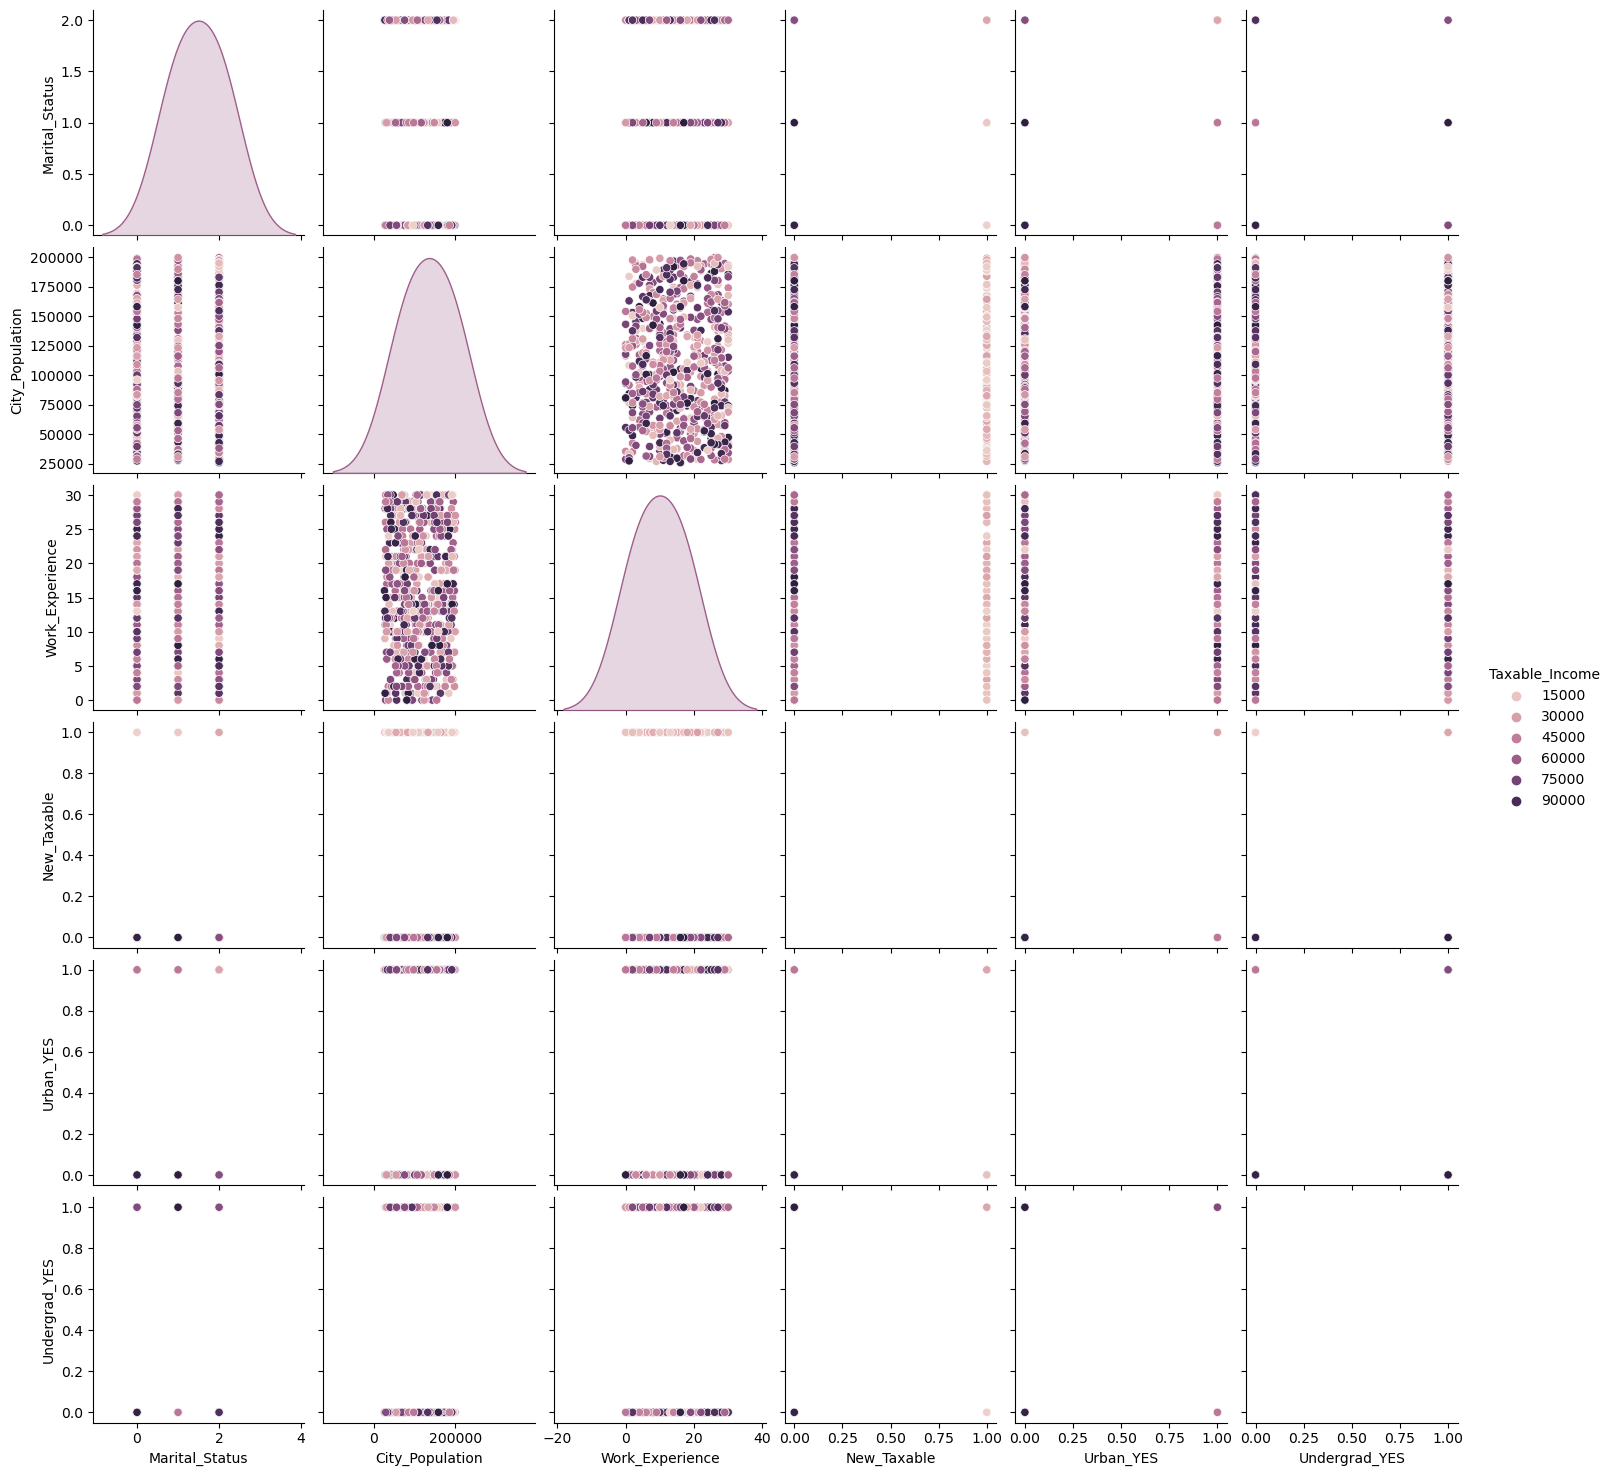

In [72]:
sns.pairplot(data=data, hue="Taxable_Income")

In [73]:
data.corr()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,New_Taxable,Urban_YES,Undergrad_YES
Marital_Status,1.000000,-0.012944,-0.001564,-0.002213,0.006081,0.064562,0.042407
Taxable_Income,-0.012944,1.000000,-0.064387,-0.001818,-0.688725,0.070628,-0.049232
City_Population,-0.001564,-0.064387,1.000000,0.013135,0.012225,-0.040098,0.079579
Work_Experience,-0.002213,-0.001818,0.013135,1.000000,-0.001972,-0.094559,-0.005362
New_Taxable,0.006081,-0.688725,0.012225,-0.001972,1.000000,0.004830,0.012523
Urban_YES,0.064562,0.070628,-0.040098,-0.094559,0.004830,1.000000,-0.000267
Undergrad_YES,0.042407,-0.049232,0.079579,-0.005362,0.012523,-0.000267,1.000000


<Axes: >

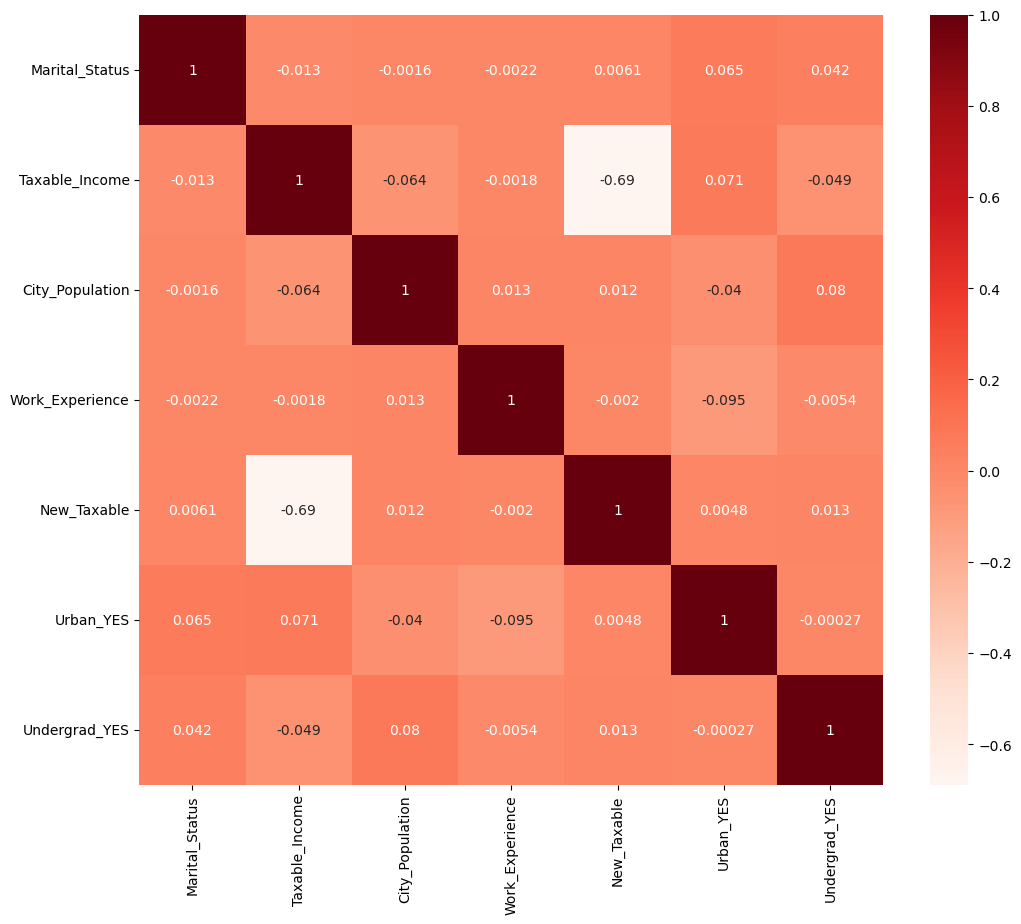

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap=plt.cm.Reds)

In [75]:
X = data.drop(columns=["Taxable_Income"], axis= 1)

In [76]:
Y = data['Taxable_Income']

In [77]:
print(X, Y)

     Marital_Status  City_Population  Work_Experience  New_Taxable  Urban_YES  \
0                 2            50047               10            0       True   
1                 0           134075               18            0       True   
2                 1           160205               30            0       True   
3                 2           193264               15            0       True   
4                 1            27533               28            0      False   
..              ...              ...              ...          ...        ...   
595               0            39492                7            0       True   
596               0            55369                2            0       True   
597               0           154058                0            0       True   
598               1           180083               17            0      False   
599               0           158137               16            0      False   

     Undergrad_YES  
0     

In [81]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier